In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.python.keras.datasets import mnist
from tensorflow.contrib.eager.python import tfe

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# enable eager mode
tf.enable_eager_execution()
tf.set_random_seed(0)
np.random.seed(0)

In [3]:
if not os.path.exists('weights/'):
    os.makedirs('weights/')

# image grid
new_im = Image.new('L', (280, 280))

# Hyper-parameters
image_size = 784
h_dim = 512
z_dim = 5  # set to larger values for slightly better reconstructions but poorer sampling
num_epochs = 15
batch_size = 100
learning_rate = 1e-3

In [4]:
# dataset loading
(x_train, y_train), (_, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0], 28 * 28))

# Varientation Autoencoder

This is a direct port of the PyTorch version. The loss factor uses pixelwise scaling to correct for how PyTorch deals with such losses vs how Tensorflow deals with them.

A new utility method `decode` is added to wrap over the `decode_logits` version, which is used by using model(...)

In [5]:
class VAE(tf.keras.Model):
    def __init__(self):
        super(VAE, self).__init__()
        self.fc1 = tf.keras.layers.Dense(h_dim)
        self.fc2 = tf.keras.layers.Dense(z_dim)
        self.fc3 = tf.keras.layers.Dense(z_dim)
        self.fc4 = tf.keras.layers.Dense(h_dim)
        self.fc5 = tf.keras.layers.Dense(image_size)

    def encode(self, x):
        h = tf.nn.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)

    def reparameterize(self, mu, log_var):
        std = tf.exp(log_var * 0.5)
        eps = tf.random_normal(std.shape)
        return mu + eps * std

    def decode_logits(self, z):
        h = tf.nn.relu(self.fc4(z))
        return self.fc5(h)

    def decode(self, z):
        return tf.nn.sigmoid(self.decode_logits(z))

    def call(self, inputs, training=None, mask=None):
        mu, log_var = self.encode(inputs)
        z = self.reparameterize(mu, log_var)
        x_reconstructed_logits = self.decode_logits(z)
        return x_reconstructed_logits, mu, log_var

Epoch[1/15], Step [10/600], Reconst Loss: 321.1473, KL Div: 6142.4448
Epoch[1/15], Step [20/600], Reconst Loss: 239.7603, KL Div: 2287.0684
Epoch[1/15], Step [30/600], Reconst Loss: 201.2074, KL Div: 1728.6483
Epoch[1/15], Step [40/600], Reconst Loss: 215.4596, KL Div: 1055.4224
Epoch[1/15], Step [50/600], Reconst Loss: 206.0385, KL Div: 1060.2485
Epoch[1/15], Step [60/600], Reconst Loss: 196.5437, KL Div: 1191.6609
Epoch[1/15], Step [70/600], Reconst Loss: 178.0580, KL Div: 1047.9967
Epoch[1/15], Step [80/600], Reconst Loss: 180.5538, KL Div: 1137.4930
Epoch[1/15], Step [90/600], Reconst Loss: 177.7494, KL Div: 1166.4900
Epoch[1/15], Step [100/600], Reconst Loss: 173.7238, KL Div: 1139.5403
Epoch[1/15], Step [110/600], Reconst Loss: 160.7034, KL Div: 1247.4451
Epoch[1/15], Step [120/600], Reconst Loss: 168.1175, KL Div: 1138.1586
Epoch[1/15], Step [130/600], Reconst Loss: 161.7300, KL Div: 1175.1577
Epoch[1/15], Step [140/600], Reconst Loss: 161.2545, KL Div: 1215.5470
Epoch[1/15], St

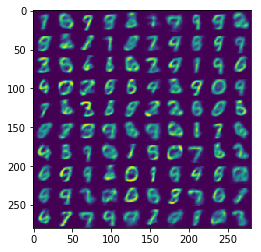

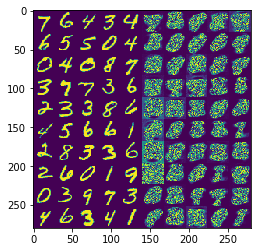

New images saved !
Epoch[2/15], Step [10/600], Reconst Loss: 137.2751, KL Div: 1067.6362
Epoch[2/15], Step [20/600], Reconst Loss: 131.9878, KL Div: 999.5335
Epoch[2/15], Step [30/600], Reconst Loss: 122.3021, KL Div: 989.0584
Epoch[2/15], Step [40/600], Reconst Loss: 132.8702, KL Div: 1031.7488
Epoch[2/15], Step [50/600], Reconst Loss: 133.8260, KL Div: 1036.1365
Epoch[2/15], Step [60/600], Reconst Loss: 126.8910, KL Div: 1112.8569
Epoch[2/15], Step [70/600], Reconst Loss: 130.8424, KL Div: 926.8548
Epoch[2/15], Step [80/600], Reconst Loss: 125.9359, KL Div: 1112.3805
Epoch[2/15], Step [90/600], Reconst Loss: 134.7045, KL Div: 1018.7708
Epoch[2/15], Step [100/600], Reconst Loss: 136.6399, KL Div: 1025.0879
Epoch[2/15], Step [110/600], Reconst Loss: 122.5449, KL Div: 1095.1421
Epoch[2/15], Step [120/600], Reconst Loss: 132.1347, KL Div: 1091.1604
Epoch[2/15], Step [130/600], Reconst Loss: 131.0570, KL Div: 1058.6539
Epoch[2/15], Step [140/600], Reconst Loss: 135.7749, KL Div: 1055.7585

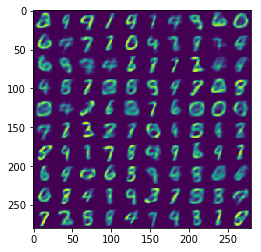

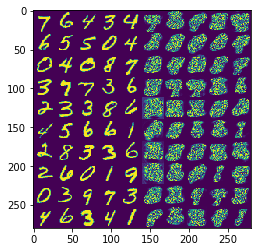

New images saved !
Epoch[3/15], Step [10/600], Reconst Loss: 131.5115, KL Div: 1075.8027
Epoch[3/15], Step [20/600], Reconst Loss: 125.9654, KL Div: 1036.2509
Epoch[3/15], Step [30/600], Reconst Loss: 118.6687, KL Div: 989.7597
Epoch[3/15], Step [40/600], Reconst Loss: 127.1447, KL Div: 1042.4331
Epoch[3/15], Step [50/600], Reconst Loss: 127.6380, KL Div: 1059.0819
Epoch[3/15], Step [60/600], Reconst Loss: 121.1776, KL Div: 1125.5981
Epoch[3/15], Step [70/600], Reconst Loss: 125.6154, KL Div: 967.0892
Epoch[3/15], Step [80/600], Reconst Loss: 118.8331, KL Div: 1133.8966
Epoch[3/15], Step [90/600], Reconst Loss: 129.1158, KL Div: 1034.7104
Epoch[3/15], Step [100/600], Reconst Loss: 131.6647, KL Div: 1039.0338
Epoch[3/15], Step [110/600], Reconst Loss: 117.6611, KL Div: 1072.9258
Epoch[3/15], Step [120/600], Reconst Loss: 125.2911, KL Div: 1102.7903
Epoch[3/15], Step [130/600], Reconst Loss: 126.9689, KL Div: 1060.2383
Epoch[3/15], Step [140/600], Reconst Loss: 129.8167, KL Div: 1087.817

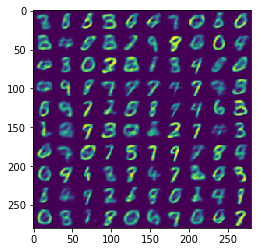

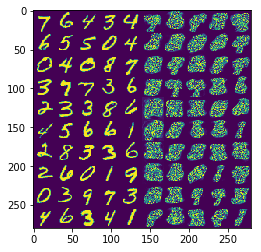

New images saved !
Epoch[4/15], Step [10/600], Reconst Loss: 128.4881, KL Div: 1060.3096
Epoch[4/15], Step [20/600], Reconst Loss: 122.9702, KL Div: 1070.4218
Epoch[4/15], Step [30/600], Reconst Loss: 116.1964, KL Div: 1046.9231
Epoch[4/15], Step [40/600], Reconst Loss: 124.8475, KL Div: 1047.5719
Epoch[4/15], Step [50/600], Reconst Loss: 125.4178, KL Div: 1098.7511
Epoch[4/15], Step [60/600], Reconst Loss: 119.0499, KL Div: 1110.9019
Epoch[4/15], Step [70/600], Reconst Loss: 122.7132, KL Div: 1006.1544
Epoch[4/15], Step [80/600], Reconst Loss: 115.3945, KL Div: 1133.6425
Epoch[4/15], Step [90/600], Reconst Loss: 126.3337, KL Div: 1054.8240
Epoch[4/15], Step [100/600], Reconst Loss: 127.3205, KL Div: 1082.6025
Epoch[4/15], Step [110/600], Reconst Loss: 115.2482, KL Div: 1078.7422
Epoch[4/15], Step [120/600], Reconst Loss: 121.9258, KL Div: 1147.8118
Epoch[4/15], Step [130/600], Reconst Loss: 124.3331, KL Div: 1090.8757
Epoch[4/15], Step [140/600], Reconst Loss: 127.0568, KL Div: 1078.2

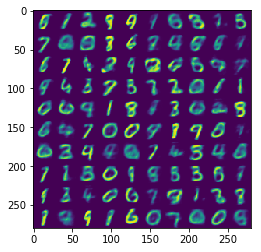

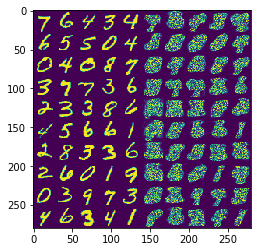

New images saved !
Epoch[5/15], Step [10/600], Reconst Loss: 125.6943, KL Div: 1105.8512
Epoch[5/15], Step [20/600], Reconst Loss: 121.3751, KL Div: 1088.8586
Epoch[5/15], Step [30/600], Reconst Loss: 115.5012, KL Div: 991.1692
Epoch[5/15], Step [40/600], Reconst Loss: 123.1122, KL Div: 1065.0078
Epoch[5/15], Step [50/600], Reconst Loss: 122.8944, KL Div: 1092.9059
Epoch[5/15], Step [60/600], Reconst Loss: 117.1097, KL Div: 1094.0831
Epoch[5/15], Step [70/600], Reconst Loss: 121.4566, KL Div: 1015.1952
Epoch[5/15], Step [80/600], Reconst Loss: 113.2472, KL Div: 1131.3685
Epoch[5/15], Step [90/600], Reconst Loss: 124.1950, KL Div: 1070.7659
Epoch[5/15], Step [100/600], Reconst Loss: 125.6304, KL Div: 1083.2919
Epoch[5/15], Step [110/600], Reconst Loss: 112.3371, KL Div: 1097.5691
Epoch[5/15], Step [120/600], Reconst Loss: 120.2999, KL Div: 1128.8564
Epoch[5/15], Step [130/600], Reconst Loss: 123.1106, KL Div: 1075.8452
Epoch[5/15], Step [140/600], Reconst Loss: 125.1233, KL Div: 1078.84

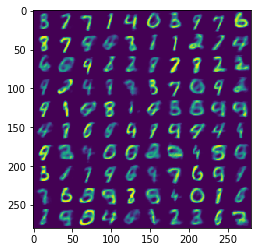

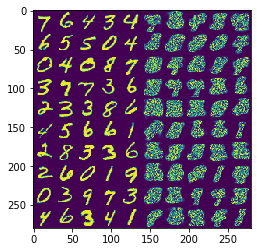

New images saved !
Epoch[6/15], Step [10/600], Reconst Loss: 124.5312, KL Div: 1100.0708
Epoch[6/15], Step [20/600], Reconst Loss: 119.6655, KL Div: 1083.2833
Epoch[6/15], Step [30/600], Reconst Loss: 113.2524, KL Div: 1036.1254
Epoch[6/15], Step [40/600], Reconst Loss: 121.0511, KL Div: 1090.8289
Epoch[6/15], Step [50/600], Reconst Loss: 122.0941, KL Div: 1102.5659
Epoch[6/15], Step [60/600], Reconst Loss: 114.5575, KL Div: 1133.7618
Epoch[6/15], Step [70/600], Reconst Loss: 120.1014, KL Div: 1061.1981
Epoch[6/15], Step [80/600], Reconst Loss: 111.9642, KL Div: 1111.0836
Epoch[6/15], Step [90/600], Reconst Loss: 123.2098, KL Div: 1091.6266
Epoch[6/15], Step [100/600], Reconst Loss: 123.8957, KL Div: 1098.8379
Epoch[6/15], Step [110/600], Reconst Loss: 111.4690, KL Div: 1094.3763
Epoch[6/15], Step [120/600], Reconst Loss: 117.8938, KL Div: 1170.8009
Epoch[6/15], Step [130/600], Reconst Loss: 121.1512, KL Div: 1108.7844
Epoch[6/15], Step [140/600], Reconst Loss: 122.8567, KL Div: 1078.8

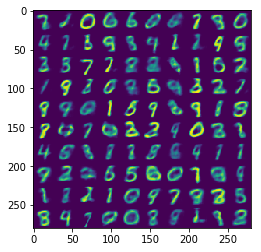

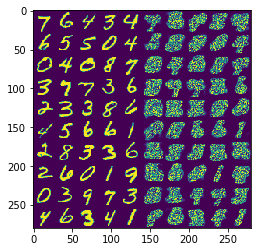

New images saved !
Epoch[7/15], Step [10/600], Reconst Loss: 123.1474, KL Div: 1111.1169
Epoch[7/15], Step [20/600], Reconst Loss: 118.5324, KL Div: 1087.9623
Epoch[7/15], Step [30/600], Reconst Loss: 112.2530, KL Div: 1059.1202
Epoch[7/15], Step [40/600], Reconst Loss: 119.9978, KL Div: 1096.9711
Epoch[7/15], Step [50/600], Reconst Loss: 120.8619, KL Div: 1120.7089
Epoch[7/15], Step [60/600], Reconst Loss: 112.9684, KL Div: 1150.5118
Epoch[7/15], Step [70/600], Reconst Loss: 119.1617, KL Div: 1028.9738
Epoch[7/15], Step [80/600], Reconst Loss: 110.1498, KL Div: 1159.3224
Epoch[7/15], Step [90/600], Reconst Loss: 121.0902, KL Div: 1119.6421
Epoch[7/15], Step [100/600], Reconst Loss: 122.7046, KL Div: 1101.9828
Epoch[7/15], Step [110/600], Reconst Loss: 110.4037, KL Div: 1090.2061
Epoch[7/15], Step [120/600], Reconst Loss: 116.1687, KL Div: 1155.1158
Epoch[7/15], Step [130/600], Reconst Loss: 118.8295, KL Div: 1129.9022
Epoch[7/15], Step [140/600], Reconst Loss: 121.4492, KL Div: 1117.1

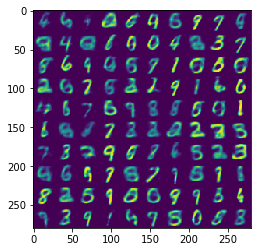

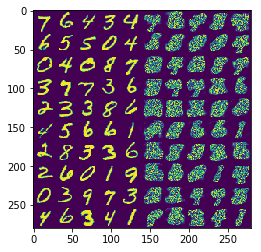

New images saved !
Epoch[8/15], Step [10/600], Reconst Loss: 122.4201, KL Div: 1069.3464
Epoch[8/15], Step [20/600], Reconst Loss: 116.9456, KL Div: 1149.2126
Epoch[8/15], Step [30/600], Reconst Loss: 111.2555, KL Div: 1046.9553
Epoch[8/15], Step [40/600], Reconst Loss: 118.5968, KL Div: 1092.8339
Epoch[8/15], Step [50/600], Reconst Loss: 119.6860, KL Div: 1150.4635
Epoch[8/15], Step [60/600], Reconst Loss: 112.3852, KL Div: 1135.2699
Epoch[8/15], Step [70/600], Reconst Loss: 118.0005, KL Div: 1060.8767
Epoch[8/15], Step [80/600], Reconst Loss: 109.2820, KL Div: 1154.7302
Epoch[8/15], Step [90/600], Reconst Loss: 119.9756, KL Div: 1131.5149
Epoch[8/15], Step [100/600], Reconst Loss: 122.1623, KL Div: 1096.3346
Epoch[8/15], Step [110/600], Reconst Loss: 108.9801, KL Div: 1129.7767
Epoch[8/15], Step [120/600], Reconst Loss: 115.1779, KL Div: 1147.1873
Epoch[8/15], Step [130/600], Reconst Loss: 118.5413, KL Div: 1127.1162
Epoch[8/15], Step [140/600], Reconst Loss: 119.9387, KL Div: 1141.8

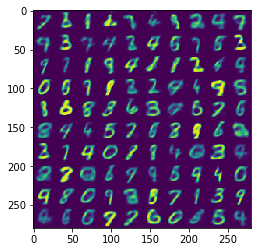

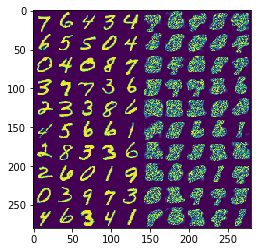

New images saved !
Epoch[9/15], Step [10/600], Reconst Loss: 120.4096, KL Div: 1136.1460
Epoch[9/15], Step [20/600], Reconst Loss: 116.3373, KL Div: 1065.4778
Epoch[9/15], Step [30/600], Reconst Loss: 109.5973, KL Div: 1111.5530
Epoch[9/15], Step [40/600], Reconst Loss: 117.8159, KL Div: 1117.7927
Epoch[9/15], Step [50/600], Reconst Loss: 118.7463, KL Div: 1133.2126
Epoch[9/15], Step [60/600], Reconst Loss: 110.4368, KL Div: 1183.5979
Epoch[9/15], Step [70/600], Reconst Loss: 118.1090, KL Div: 1038.5222
Epoch[9/15], Step [80/600], Reconst Loss: 108.5064, KL Div: 1138.5699
Epoch[9/15], Step [90/600], Reconst Loss: 119.4608, KL Div: 1166.3667
Epoch[9/15], Step [100/600], Reconst Loss: 121.1037, KL Div: 1084.2938
Epoch[9/15], Step [110/600], Reconst Loss: 107.5537, KL Div: 1148.5771
Epoch[9/15], Step [120/600], Reconst Loss: 114.8726, KL Div: 1145.4177
Epoch[9/15], Step [130/600], Reconst Loss: 118.7282, KL Div: 1104.5804
Epoch[9/15], Step [140/600], Reconst Loss: 118.4397, KL Div: 1143.7

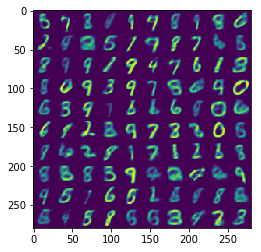

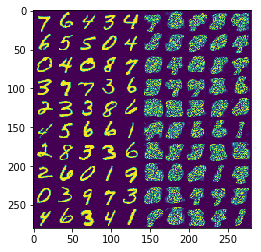

New images saved !
Epoch[10/15], Step [10/600], Reconst Loss: 119.3361, KL Div: 1127.1404
Epoch[10/15], Step [20/600], Reconst Loss: 114.6861, KL Div: 1140.0222
Epoch[10/15], Step [30/600], Reconst Loss: 109.5762, KL Div: 1068.9556
Epoch[10/15], Step [40/600], Reconst Loss: 116.2885, KL Div: 1123.6251
Epoch[10/15], Step [50/600], Reconst Loss: 118.0132, KL Div: 1149.1283
Epoch[10/15], Step [60/600], Reconst Loss: 109.9191, KL Div: 1168.5345
Epoch[10/15], Step [70/600], Reconst Loss: 116.8971, KL Div: 1063.6953
Epoch[10/15], Step [80/600], Reconst Loss: 107.3169, KL Div: 1162.0533
Epoch[10/15], Step [90/600], Reconst Loss: 118.5559, KL Div: 1126.1071
Epoch[10/15], Step [100/600], Reconst Loss: 119.9268, KL Div: 1119.8188
Epoch[10/15], Step [110/600], Reconst Loss: 107.7391, KL Div: 1130.2554
Epoch[10/15], Step [120/600], Reconst Loss: 113.3932, KL Div: 1153.8789
Epoch[10/15], Step [130/600], Reconst Loss: 116.1795, KL Div: 1158.9679
Epoch[10/15], Step [140/600], Reconst Loss: 118.3992, 

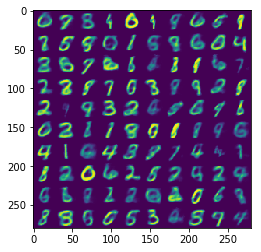

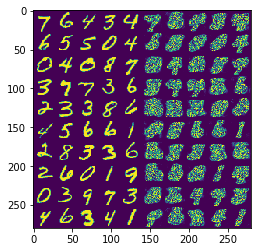

New images saved !
Epoch[11/15], Step [10/600], Reconst Loss: 118.4110, KL Div: 1144.7648
Epoch[11/15], Step [20/600], Reconst Loss: 114.2456, KL Div: 1146.7603
Epoch[11/15], Step [30/600], Reconst Loss: 108.0474, KL Div: 1103.9523
Epoch[11/15], Step [40/600], Reconst Loss: 115.7545, KL Div: 1119.6085
Epoch[11/15], Step [50/600], Reconst Loss: 117.6355, KL Div: 1121.7981
Epoch[11/15], Step [60/600], Reconst Loss: 109.0436, KL Div: 1173.5049
Epoch[11/15], Step [70/600], Reconst Loss: 115.9022, KL Div: 1100.9215
Epoch[11/15], Step [80/600], Reconst Loss: 106.1990, KL Div: 1140.3059
Epoch[11/15], Step [90/600], Reconst Loss: 117.1697, KL Div: 1157.8291
Epoch[11/15], Step [100/600], Reconst Loss: 119.0605, KL Div: 1138.7079
Epoch[11/15], Step [110/600], Reconst Loss: 106.6495, KL Div: 1124.0015
Epoch[11/15], Step [120/600], Reconst Loss: 112.4053, KL Div: 1211.2816
Epoch[11/15], Step [130/600], Reconst Loss: 116.1765, KL Div: 1129.6143
Epoch[11/15], Step [140/600], Reconst Loss: 116.8826, 

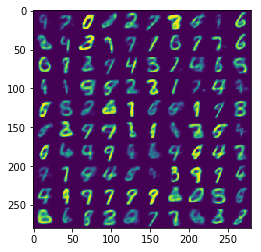

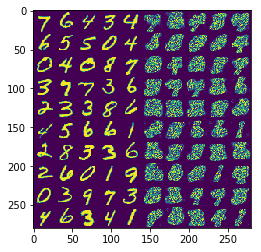

New images saved !
Epoch[12/15], Step [10/600], Reconst Loss: 118.1502, KL Div: 1152.4434
Epoch[12/15], Step [20/600], Reconst Loss: 113.9265, KL Div: 1106.9579
Epoch[12/15], Step [30/600], Reconst Loss: 107.2326, KL Div: 1102.4623
Epoch[12/15], Step [40/600], Reconst Loss: 114.4865, KL Div: 1162.3943
Epoch[12/15], Step [50/600], Reconst Loss: 116.8354, KL Div: 1126.5250
Epoch[12/15], Step [60/600], Reconst Loss: 108.5182, KL Div: 1177.0017
Epoch[12/15], Step [70/600], Reconst Loss: 115.9272, KL Div: 1057.2401
Epoch[12/15], Step [80/600], Reconst Loss: 105.6046, KL Div: 1165.1885
Epoch[12/15], Step [90/600], Reconst Loss: 116.7998, KL Div: 1172.7617
Epoch[12/15], Step [100/600], Reconst Loss: 119.2137, KL Div: 1112.6122
Epoch[12/15], Step [110/600], Reconst Loss: 106.1608, KL Div: 1141.6306
Epoch[12/15], Step [120/600], Reconst Loss: 111.3526, KL Div: 1203.4000
Epoch[12/15], Step [130/600], Reconst Loss: 114.4543, KL Div: 1155.8517
Epoch[12/15], Step [140/600], Reconst Loss: 116.8602, 

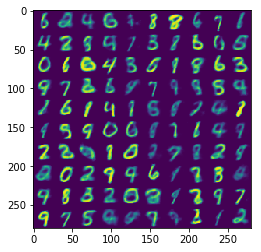

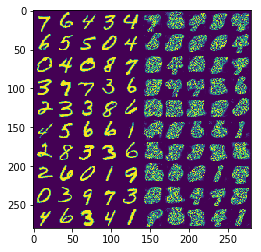

New images saved !
Epoch[13/15], Step [10/600], Reconst Loss: 117.2444, KL Div: 1163.8793
Epoch[13/15], Step [20/600], Reconst Loss: 112.7425, KL Div: 1129.9475
Epoch[13/15], Step [30/600], Reconst Loss: 106.4351, KL Div: 1095.7972
Epoch[13/15], Step [40/600], Reconst Loss: 113.8025, KL Div: 1148.4077
Epoch[13/15], Step [50/600], Reconst Loss: 116.1738, KL Div: 1117.7427
Epoch[13/15], Step [60/600], Reconst Loss: 108.6314, KL Div: 1143.5624
Epoch[13/15], Step [70/600], Reconst Loss: 114.9327, KL Div: 1124.2529
Epoch[13/15], Step [80/600], Reconst Loss: 105.2992, KL Div: 1144.3339
Epoch[13/15], Step [90/600], Reconst Loss: 116.4103, KL Div: 1167.0834
Epoch[13/15], Step [100/600], Reconst Loss: 118.4737, KL Div: 1104.4303
Epoch[13/15], Step [110/600], Reconst Loss: 105.5215, KL Div: 1148.5941
Epoch[13/15], Step [120/600], Reconst Loss: 111.8566, KL Div: 1153.4309
Epoch[13/15], Step [130/600], Reconst Loss: 115.1087, KL Div: 1149.2297
Epoch[13/15], Step [140/600], Reconst Loss: 116.3392, 

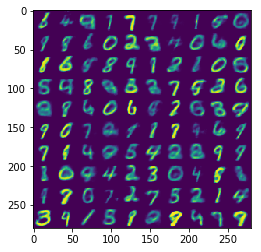

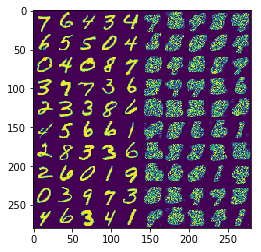

New images saved !
Epoch[14/15], Step [10/600], Reconst Loss: 116.7488, KL Div: 1137.2119
Epoch[14/15], Step [20/600], Reconst Loss: 111.9384, KL Div: 1149.3693
Epoch[14/15], Step [30/600], Reconst Loss: 105.5936, KL Div: 1128.5403
Epoch[14/15], Step [40/600], Reconst Loss: 113.9626, KL Div: 1106.3105
Epoch[14/15], Step [50/600], Reconst Loss: 115.4280, KL Div: 1152.3258
Epoch[14/15], Step [60/600], Reconst Loss: 107.5740, KL Div: 1176.9247
Epoch[14/15], Step [70/600], Reconst Loss: 114.2072, KL Div: 1099.8344
Epoch[14/15], Step [80/600], Reconst Loss: 103.9382, KL Div: 1182.1132
Epoch[14/15], Step [90/600], Reconst Loss: 115.1498, KL Div: 1182.4802
Epoch[14/15], Step [100/600], Reconst Loss: 117.9132, KL Div: 1112.1047
Epoch[14/15], Step [110/600], Reconst Loss: 105.1026, KL Div: 1122.1102
Epoch[14/15], Step [120/600], Reconst Loss: 110.3534, KL Div: 1203.0521
Epoch[14/15], Step [130/600], Reconst Loss: 113.0118, KL Div: 1184.6826
Epoch[14/15], Step [140/600], Reconst Loss: 115.2977, 

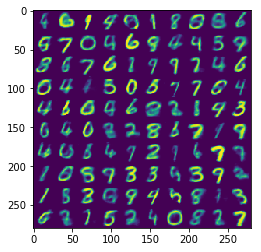

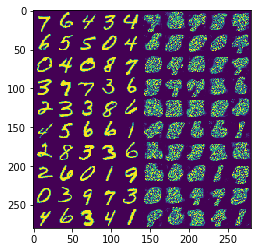

New images saved !
Epoch[15/15], Step [10/600], Reconst Loss: 116.0867, KL Div: 1142.0039
Epoch[15/15], Step [20/600], Reconst Loss: 111.9183, KL Div: 1135.4047
Epoch[15/15], Step [30/600], Reconst Loss: 105.2070, KL Div: 1125.8285
Epoch[15/15], Step [40/600], Reconst Loss: 113.2427, KL Div: 1114.3333
Epoch[15/15], Step [50/600], Reconst Loss: 114.5015, KL Div: 1201.4531
Epoch[15/15], Step [60/600], Reconst Loss: 107.8855, KL Div: 1151.3857
Epoch[15/15], Step [70/600], Reconst Loss: 113.8884, KL Div: 1080.4912
Epoch[15/15], Step [80/600], Reconst Loss: 104.1060, KL Div: 1182.9001
Epoch[15/15], Step [90/600], Reconst Loss: 115.4456, KL Div: 1138.9489
Epoch[15/15], Step [100/600], Reconst Loss: 117.4039, KL Div: 1106.1729
Epoch[15/15], Step [110/600], Reconst Loss: 104.4921, KL Div: 1134.4562
Epoch[15/15], Step [120/600], Reconst Loss: 110.1372, KL Div: 1198.9974
Epoch[15/15], Step [130/600], Reconst Loss: 113.4023, KL Div: 1140.8060
Epoch[15/15], Step [140/600], Reconst Loss: 114.7374, 

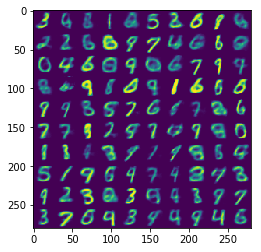

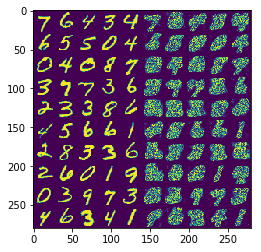

New images saved !


In [7]:
device = '/cpu:0' if tfe.num_gpus() == 0 else '/gpu:0'

with tf.device(device):
    # build model and optimizer
    model = VAE()
    optimizer = tf.train.AdamOptimizer(learning_rate)

    # create the database iterator
    dataset = tf.data.Dataset.from_tensor_slices((x_train,))
    dataset = dataset.shuffle(batch_size * 5)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(10)

    num_batches = x_train.shape[0] // batch_size

    for epoch in range(num_epochs):
        for batch, (images,) in enumerate(dataset):

            with tf.GradientTape() as tape:
                # Forward pass
                x_reconstruction_logits, mu, log_var = model(images)

                # Compute reconstruction loss and kl divergence
                # For KL divergence, see Appendix B in VAE paper or http://yunjey47.tistory.com/43
                # Scaled by `image_size` for each individual pixel.
                reconstruction_loss = image_size * tf.nn.sigmoid_cross_entropy_with_logits(labels=images, logits=x_reconstruction_logits)
                kl_div = - 0.5 * tf.reduce_sum(1. + log_var - tf.square(mu) - tf.exp(log_var), axis=-1)

                # Backprop and optimize
                loss = tf.reduce_mean(reconstruction_loss) + kl_div

            gradients = tape.gradient(loss, model.variables)
            grad_vars = zip(gradients, model.variables)
            optimizer.apply_gradients(grad_vars, tf.train.get_or_create_global_step())

            if (batch + 1) % 10 == 0:
                reconstruction_loss = tf.reduce_mean(reconstruction_loss)
                kl_div = tf.reduce_sum(kl_div)
                print("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}"
                      .format(epoch + 1, num_epochs, batch + 1, num_batches, reconstruction_loss.numpy(), kl_div.numpy()))

            if batch > num_batches:
                break

        saver = tfe.Saver(model.variables)
        saver.save('weights/09_vae/weights.ckpt')

        # evaluate
        z = tf.random_normal((batch_size, z_dim))
        out = model.decode(z)  # decode with sigmoid
        out = tf.reshape(out, [-1, 28, 28]).numpy() * 255
        out = out.astype(np.uint8)

        index = 0
        for i in range(0, 280, 28):
            for j in range(0, 280, 28):
                im = out[index]
                im = Image.fromarray(im, mode='L')
                new_im.paste(im, (i, j))
                index += 1

        new_im.save('images/vae_sampled_epoch_%d.png' % (epoch + 1))
        plt.imshow(np.asarray(new_im))
        plt.show()

        # Save the reconstructed images of last batch
        out_logits, _, _ = model(images[:batch_size // 2])
        out = tf.nn.sigmoid(out_logits)  # out is just the logits, use sigmoid
        out = tf.reshape(out, [-1, 28, 28]).numpy() * 255

        images = tf.reshape(images[:batch_size // 2], [-1, 28, 28])

        x_concat = tf.concat([images, out], axis=0).numpy() * 255.
        x_concat = x_concat.astype(np.uint8)

        index = 0
        for i in range(0, 280, 28):
            for j in range(0, 280, 28):
                im = x_concat[index]
                im = Image.fromarray(im, mode='L')
                new_im.paste(im, (i, j))
                index += 1

        new_im.save('images/vae_reconstructed_epoch_%d.png' % (epoch + 1))
        plt.imshow(np.asarray(new_im))
        plt.show()
        print('New images saved !')
        
        